In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
def shuffle(df, n=1, axis=0):
    df = df.copy()
    for _ in range(n):
        df.apply(np.random.shuffle, axis=axis)
    return df

In [3]:
data1 = pd.read_csv('./results/5000_features.csv')
data = pd.read_csv('./results/5000_genderbias+.csv') 
data['count'] = data1['word count']
#data=shuffle(data)

In [4]:
data.describe()

,bias,female,gender,male,word ratio,count
count,5000.000000,5000.000000,5000.00000,5000.000000,5.000000e+03,5000.000000
mean,1.208864,711.936201,0.50000,1110.373001,6.695622e-01,72007.571400
std,0.839965,1118.334510,0.50005,1309.358605,2.434521e-01,58705.187567
min,0.000000,0.000001,0.00000,0.000001,7.407407e-09,297.000000
25%,0.544440,36.000001,0.00000,132.750001,4.990933e-01,27489.500000
50%,0.973110,204.500001,0.50000,604.500001,7.012832e-01,61857.500000
75%,1.763786,1008.000001,1.00000,1716.000001,8.737521e-01,99864.750000
max,3.555348,22714.000001,1.00000,16496.000001,1.000000e+00,920459.000000


In [5]:
data.loc[:,'TFF'] = data.loc[:,'female']/data.loc[:,'count']
data.loc[:,'TFM'] = data.loc[:,'male']/data.loc[:,'count']

In [6]:
data_female = data[data['label'] == 0]
data_female.describe()

KeyError: 'label'

In [9]:
data_male = data[data['label'] == 1]
data_male.describe()

,label,F_feature,WC_1,WC_2,WC_3,WC_4,WC_5,WC_6,WC_7,WC_8,...,GRF_4,GRF_5,GRF_6,GRF_7,GRF_8,GRF_9,GRF_10,bias,word ratio,word count
count,2500.0,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,...,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2.500000e+03,2500.000000
mean,1.0,0.211556,0.073098,0.037485,0.111336,0.015452,0.083352,0.007192,0.061031,0.032780,...,0.019565,0.039427,0.087779,0.019894,0.267692,0.092572,0.001480,1.456790,7.636494e-01,70362.442800
std,0.0,1.141233,0.062829,0.060118,0.152247,0.018891,0.174512,0.008638,0.068665,0.068338,...,0.022235,0.064618,0.067714,0.023126,0.215596,0.166679,0.003398,0.909500,2.222621e-01,60518.833295
min,1.0,-1.073360,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.234568e-08,422.000000
25%,1.0,-0.513281,0.000000,0.000000,0.007834,0.000000,0.015914,0.000000,0.027908,0.010466,...,0.000000,0.001229,0.017846,0.000000,0.002959,0.003618,0.000000,0.730632,6.648987e-01,23582.000000
50%,1.0,-0.188181,0.079722,0.033438,0.076411,0.011183,0.033814,0.004303,0.056959,0.023598,...,0.017176,0.026205,0.097556,0.019787,0.332260,0.053191,0.000000,1.394456,8.158066e-01,58444.500000
75%,1.0,0.521821,0.122176,0.052258,0.112847,0.026437,0.051844,0.012296,0.078174,0.036342,...,0.026720,0.053062,0.127930,0.031893,0.443853,0.076724,0.001504,2.188705,9.337710e-01,98653.500000
max,1.0,11.101502,0.312306,1.000000,1.000000,0.500000,1.000000,0.067719,1.000000,1.000000,...,0.271808,0.885714,0.573770,0.400000,1.000000,1.000000,0.043478,3.555348,1.000000e+00,469263.000000


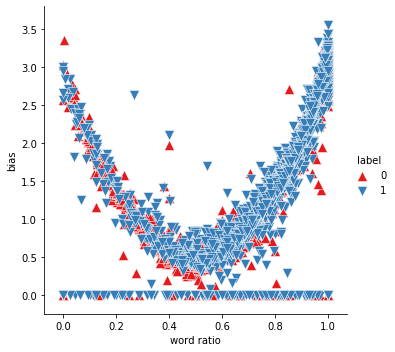

In [18]:
g = sns.FacetGrid(data,
                  hue="label",
                  palette="Set1",
                  height=5,
                  hue_kws={"marker": ["^", "v"]})
g.map(plt.scatter,
      "word ratio",
      "bias",
      s=100,
      linewidth=.5,
      edgecolor="white")
g.add_legend()

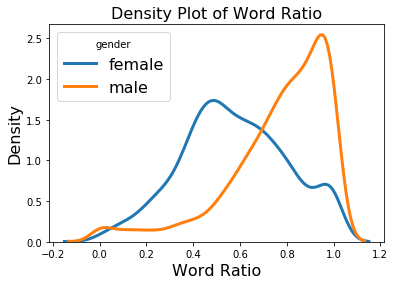

In [7]:
# List of five airlines to plot
genders = ['female', 'male']

# Iterate through the five airlines
for gender in genders:
    # Subset to the airline
    if gender == 'female':
        subset = data[data['gender'] == 0]
    else:
        subset = data[data['gender'] == 1]

    # Draw the density plot
    sns.distplot(subset['word ratio'],
                 hist=False,
                 kde=True,
                 kde_kws={'linewidth': 3},
                 label=gender)

# Plot formatting
plt.legend(prop={'size': 16}, title='gender', fontsize=16)
plt.title('Density Plot of Word Ratio', fontsize=16)
plt.xlabel('Word Ratio', fontsize=16)
plt.ylabel('Density', fontsize=16)
plt.savefig('5000-wordratio.png', dpi=150,bbox_inches = 'tight')

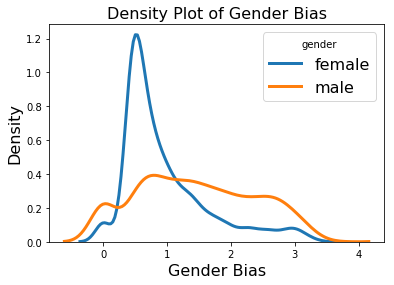

In [8]:
# List of five airlines to plot
genders = ['female', 'male']

# Iterate through the five airlines
for gender in genders:
    # Subset to the airline
    if gender == 'female':
        subset = data[data['gender'] == 0]
    else:
        subset = data[data['gender'] == 1]

    # Draw the density plot
    sns.distplot(subset['bias'],
                 hist=False,
                 kde=True,
                 kde_kws={'linewidth': 3},
                 label=gender)

# Plot formatting
plt.legend(prop={'size': 16}, title='gender', fontsize=16)
plt.title('Density Plot of Gender Bias', fontsize=16)
plt.xlabel('Gender Bias', fontsize=16)
plt.ylabel('Density', fontsize=16)
plt.savefig('5000-bias.png', dpi=150, bbox_inches='tight')

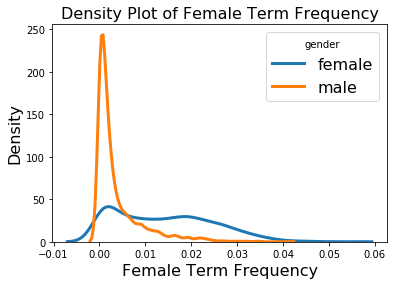

In [9]:
# List of five airlines to plot
genders = ['female', 'male']

# Iterate through the five airlines
for gender in genders:
    # Subset to the airline
    if gender == 'female':
        subset = data[data['gender'] == 0]
    else:
        subset = data[data['gender'] == 1]

    # Draw the density plot
    sns.distplot(subset['TFF'],
                 hist=False,
                 kde=True,
                 kde_kws={'linewidth': 3},
                 label=gender)

# Plot formatting
plt.legend(prop={'size': 16}, title='gender', fontsize=16)
plt.title('Density Plot of Female Term Frequency', fontsize=16)
plt.xlabel('Female Term Frequency', fontsize=16)
plt.ylabel('Density', fontsize=16)
plt.savefig('5000-TFF.png', dpi=150, bbox_inches='tight')

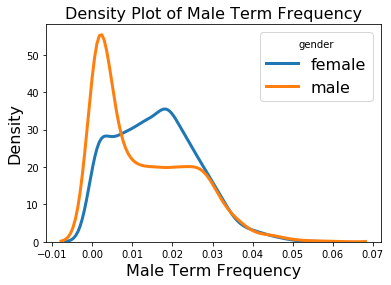

In [10]:
# List of five airlines to plot
genders = ['female', 'male']

# Iterate through the five airlines
for gender in genders:
    # Subset to the airline
    if gender == 'female':
        subset = data[data['gender'] == 0]
    else:
        subset = data[data['gender'] == 1]

    # Draw the density plot
    sns.distplot(subset['TFM'],
                 hist=False,
                 kde=True,
                 kde_kws={'linewidth': 3},
                 label=gender)

# Plot formatting
plt.legend(prop={'size': 16}, title='gender', fontsize=16)
plt.title('Density Plot of Male Term Frequency', fontsize=16)
plt.xlabel('Male Term Frequency', fontsize=16)
plt.ylabel('Density', fontsize=16)
plt.savefig('5000-TFM.png', dpi=150, bbox_inches='tight')

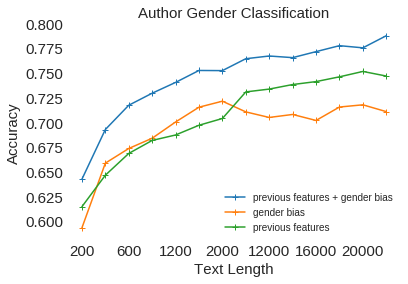

<Figure size 432x288 with 0 Axes>

In [13]:
from matplotlib.pyplot import MultipleLocator

data1 = pd.read_csv('./results/length_v_acc_and_im.csv')
plt.style.use('seaborn-darkgrid')
All_Features = list(data1['All features'])[0:-1]
Gender_Bias = list(data1['Gender bias'])[0:-1]
Without_Gender_Bias = list(data1['Without gb'])[:-1]

ax = plt.gca()
fig = plt.gcf()
ax.set_facecolor('w')
x_major_locator = MultipleLocator(2)
ax.xaxis.set_major_locator(x_major_locator)
length = list(data1['length'])[0:-1]
line_chart1 = plt.plot(length, All_Features, marker='+')
line_chart2 = plt.plot(length, Gender_Bias, marker='+')
line_chart3 = plt.plot(length, Without_Gender_Bias, marker='+')
plt.title('Author Gender Classification', fontsize=15)
plt.xlabel('Text Length', fontsize=15)
plt.ylabel('Accuracy', fontsize=15)
plt.legend(
    ['previous features + gender bias', 'gender bias', 'previous features'],
    loc=4,
    fontsize=10)
plt.ylim((0.58, 0.80))
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.figure(facecolor='white', edgecolor='white')

fig.savefig('length_v_acc.png', dpi=150, bbox_inches='tight')